### Projeto de classificação de multiclasses
#### O intuito do projeto é construir um modelo de predição que seja capaz de classificar as pessoas em 3 tipos
    - Diabéticas - 1
    - Pré diabéticas - 2
    - Não diabéticas - 0

### Primeiro passo: EDA (Análise exploratória de dados)

In [26]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None) 
df = pd.read_csv("Dataset of Diabetes .csv")
df2 = pd.read_csv('diabetes.csv')
df.drop(columns=['ID','No_Pation'],inplace=True)
df['CLASS'].replace(to_replace=['N','N ','Y','Y ','P'],value=[0,0,1,1,2],inplace=True)
df['Gender'].replace(to_replace=['F','f','M'],value=[0,0,1],inplace=True)

df['Class'] = df['CLASS']

df.drop(axis=1,columns='CLASS',inplace=True)
df_combined = pd.concat([df,df2],ignore_index=True)
df_combined = df_combined.drop_duplicates()

print(df_combined['Class'].value_counts())

Class
1    730
2    168
0     96
Name: count, dtype: int64


C:\Users\Railton\AppData\Local\Temp\ipykernel_9932\825453710.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CLASS'].replace(to_replace=['N','N ','Y','Y ','P'],value=[0,0,1,1,2],inplace=True)
C:\Users\Railton\AppData\Local\Temp\ipykernel_9932\825453710.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

### Plotagem da distribuição de classes usando gráfico de torta
### Plotagem dos dados usando uma boxplot

Essa etapa visa visualizar a distribuição dos dados para uma análise mais profunda, também é útil para visualização de outliers

- Como os dados são do contexto médico, nem sempre tirar os outliers é a melhor escolha, por isso, não vou tirar os outliers. Outro motivo para isso é que vou utilizar o algoritmo Random Forest, devido a natureza do modelo eçe consegue lidar bem com outliers

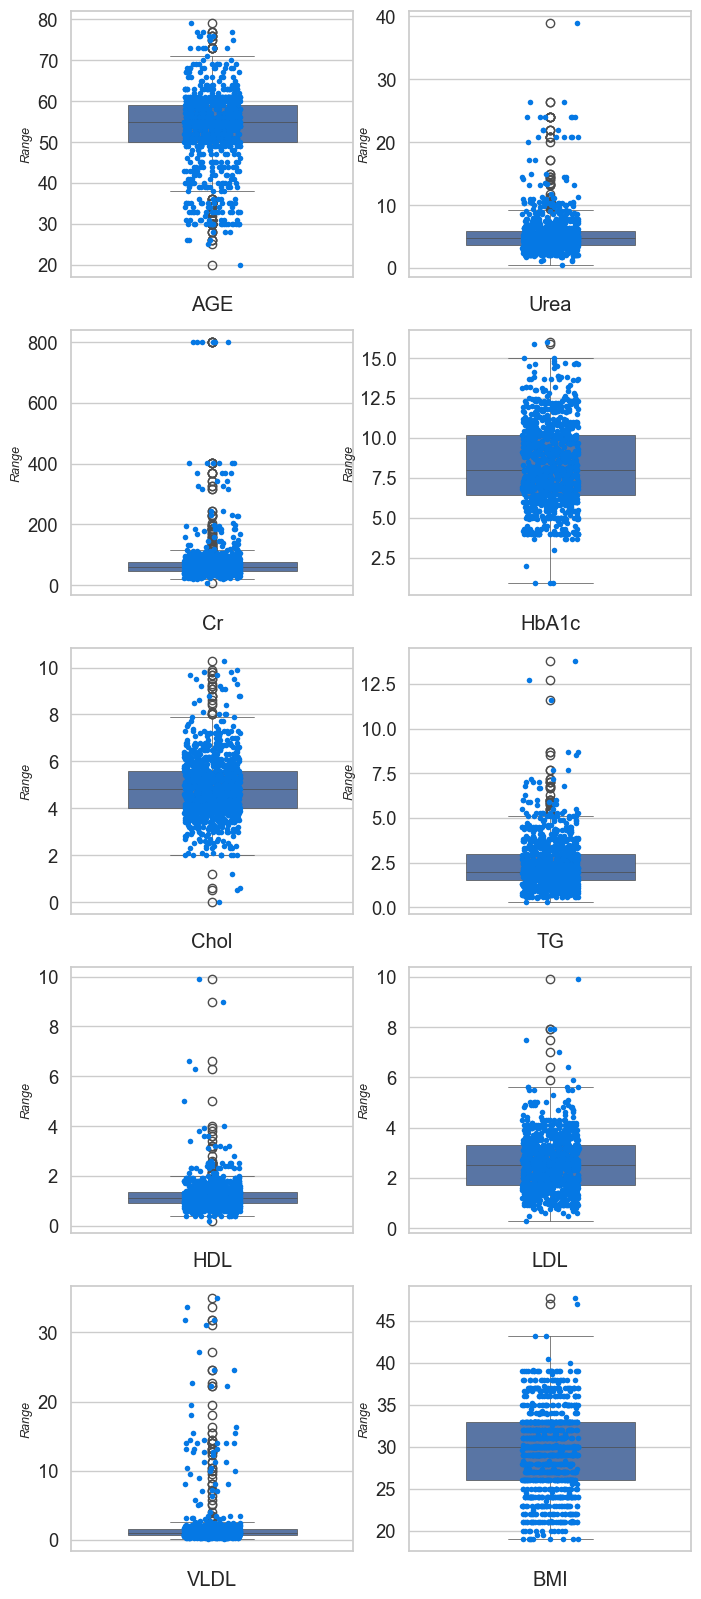

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(8,20),width_ratios=[2,2],height_ratios=[4,4,4,4,4])

axes_flat = axes.flatten()
fig.set_facecolor("white")
columns = df_combined.columns[1:-1]
axes_columns = zip(columns,axes_flat)
sns.set_theme('notebook',font_scale=1.2,style='whitegrid')

for column,axe in axes_columns:
    sns.boxplot(data=df_combined,y=df_combined[column],ax=axe,linewidth=0.5,width=0.6)
    axe.set_ylabel("Range",fontdict={'fontsize':9,'fontfamily':'Arial','style':'italic'})
    axe.set_xlabel(column)
    axe.patch.set_edgecolor('red')
    sns.stripplot(ax=axe,data=df_combined,y=df_combined[column],size=4,jitter=True,color='#0578e4')

plt.show()




### Plotar a distribuição de classes


Class
1    730
2    168
0     96
Name: count, dtype: int64


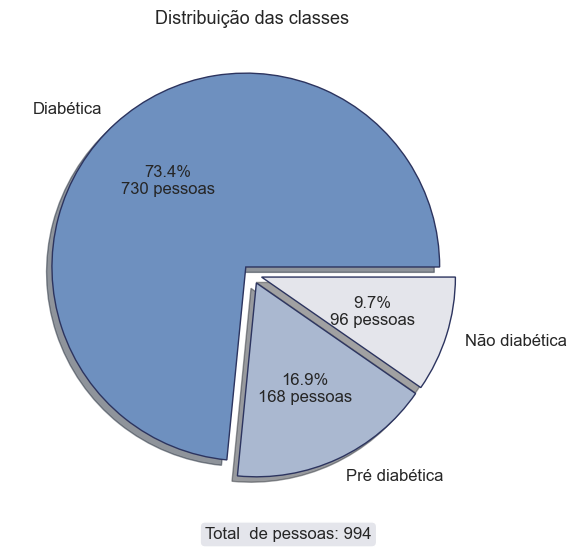

In [28]:
valores = df_combined['Class'].value_counts()
print(valores)
cores = sns.color_palette("vlag").as_hex()
plt.figure(figsize=(6,6))
plt.title("Distribuição das classes",fontdict={"fontsize":13,'fontfamily':"Arial"})
pie = plt.pie(x=valores,labels=['Diabética','Pré diabética','Não diabética'],colors=cores,explode=(0.05,0.05,0.05)
              ,shadow=True,autopct="%1.1f%%",textprops={'fontsize':12,'fontfamily':"Arial"})
textos = pie[2]
wedges = pie[0]

wedges[0].set_edgecolor('#2c345f')
wedges[1].set_edgecolor("#2c345f")
wedges[2].set_edgecolor("#2c345f")

texto_wedge1 = textos[0].get_text() + '\n' + f'{valores[1]} pessoas'
textos[0].set_text(texto_wedge1)
texto_wedge2 = textos[1].get_text() + '\n' + f'{valores[2]} pessoas'
textos[1].set_text(texto_wedge2)
texto_wedge3 = textos[2].get_text() + '\n' + f'{valores[0]} pessoas'
textos[2].set_text(texto_wedge3)

info = f"Total  de pessoas: {sum(valores)}"
plt.figtext(0.5,0.04,info,bbox={'boxstyle':'round','facecolor':'#e4e5eb'},ha='center',fontdict=
            {'fontsize':12,
             'fontweight':'light',
             'fontfamily':'Arial'})

plt.tight_layout()
plt.show()



- Como esse dataset já foi tratado por um usuário do Kaggle, não sobraram dados nulo, vazios e nem nada do tipo, por isso a etapa de EDA foi mais focada na visualização dos dados

### 2 etapa: Estratificar os dados



In [29]:
from sklearn.model_selection import train_test_split
x = df_combined.drop(axis=1,columns=['Class'])
y = df_combined['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3,train_size=0.7,stratify=y,shuffle=True)

### Normalizar os dados:

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)
x_train_normalized = pd.DataFrame(x_train_normalized)
x_test_normalized = pd.DataFrame(x_test_normalized)

### Utilização do ADASYN para criação de pacientes virtuais para equilibrar as classes nos dados de teste

In [31]:
from imblearn.over_sampling import SMOTE

exemplos_divisao = {
    2:200,0:150
}
print(y_train.value_counts())
smote = SMOTE(sampling_strategy=exemplos_divisao,random_state=42,k_neighbors=5)
x_smote,y_smote = smote.fit_resample(X=x_train_normalized,y=y_train)

print(y_smote.value_counts())

Class
1    510
2    118
0     67
Name: count, dtype: int64
Class
1    510
2    200
0    150
Name: count, dtype: int64


### 3 etapa: Treinar o modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,classification_report

model = RandomForestClassifier(n_estimators=50,max_depth=5,max_features='sqrt',min_samples_leaf=5,min_samples_split=5,random_state=42,class_weight='balanced')

a = model.(x_smote,y_smote)
ans = model.predict(x_test_normalized)
print(a)
score = f1_score(y_pred=ans,y_true=y_test,average='macro')

print(f'{score*100:.2f}%')

print(classification_report(y_true=y_test,y_pred=ans))


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=50, random_state=42)
67.36%
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        29
           1       0.85      0.75      0.79       220
           2       0.29      0.40      0.34        50

    accuracy                           0.71       299
   macro avg       0.65      0.72      0.67       299
weighted avg       0.75      0.71      0.73       299

